## Downloading required packages and dataset

In [2]:
import numpy as np
#import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras import utils
from keras.optimizers import RMSprop


import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import cifar10 # importing the CIFAR10 dataset

## Exploring the dataset

Traning data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')
Size of the dataframe: (50000, 3072)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1


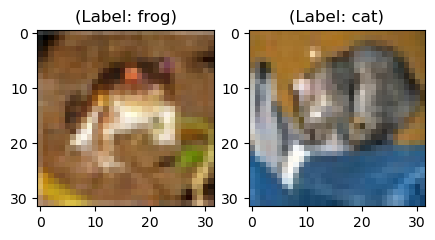

In [15]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() #store training and test images along with the labels in their appropriate variables
print('Traning data shape:', x_train.shape) #shows the training data shape
print('Testing data shape:', x_test.shape)  #shows the testing data shape
y_train.shape,y_test.shape                  #.......

#Exploring the various classes and labels the data has
classes = np.unique(y_train)
nClasses = len(classes) 
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

#class names dictionary for better understanding 
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))


### 1.1 Data visualization for Cifar10

In [ ]:

# Normalizing the dataset values
np.min(x_train),np.max(x_train) # Minimum and maximum value of x_train array, the output is (0.0, 1.0)
x_train = x_train/255.0 # Normalization by dividing each element with 255
x_train.shape 

x_test = x_test/255.0    # Applying normalization to test data as well
x_test = x_test.reshape(-1,32,32,3)    # Reshaping the input from a flat array into a 4D array which has shape(-1,32,32,3) 
x_test_flat = x_test.reshape(-1,3072)     # Flattening the image

# Creating a dataframe to hold the pixel values of the images along with their respective labels in a row-column format.
x_train_flat = x_train.reshape(-1,3072)
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]    # Creating feature list
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)         # Converting array to pandas dataframe
print('Size of the dataframe: {}'.format(df_cifar.shape))           # Size of the dataframe, the output is (50000, 3073)
df_cifar['label'] = y_train                    # Adding label column to the dataframe
df_cifar.head()    # Displaying first five rows of the dataframe


#Visualise with 2 PCA components

pca_cifar = PCA(n_components=2)    # Defining a PCA object with 2 components
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])    # Transforming the features into principal components

principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])    # Creating new Data frame from the numpy array
principal_cifar_Df['y'] = y_train       #Adding a column into the dataframe that will be populated with y_train values

principal_cifar_Df.head()    #Displaying the first few rows after transformation

#Plotting scatter plot using Seaborn library
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)    



## 2.1. Testing different number of components

### Case 1: Number of components will be set to 2

<Axes: xlabel='principal component 1', ylabel='principal component 2'>

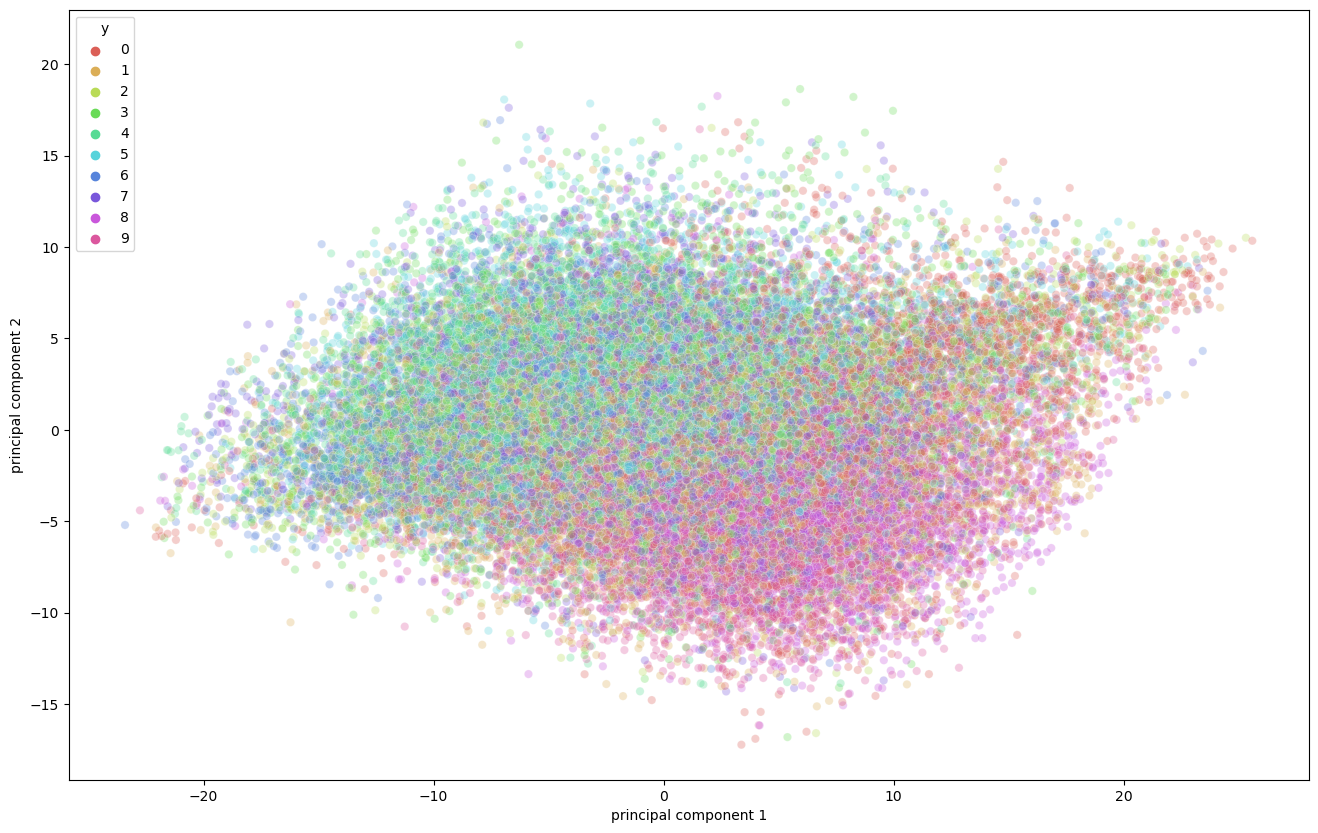

In [16]:
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train

principal_cifar_Df.head()

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

### Case 2: Number of components will be set to 3

<Axes: xlabel='principal component 2', ylabel='principal component 3'>

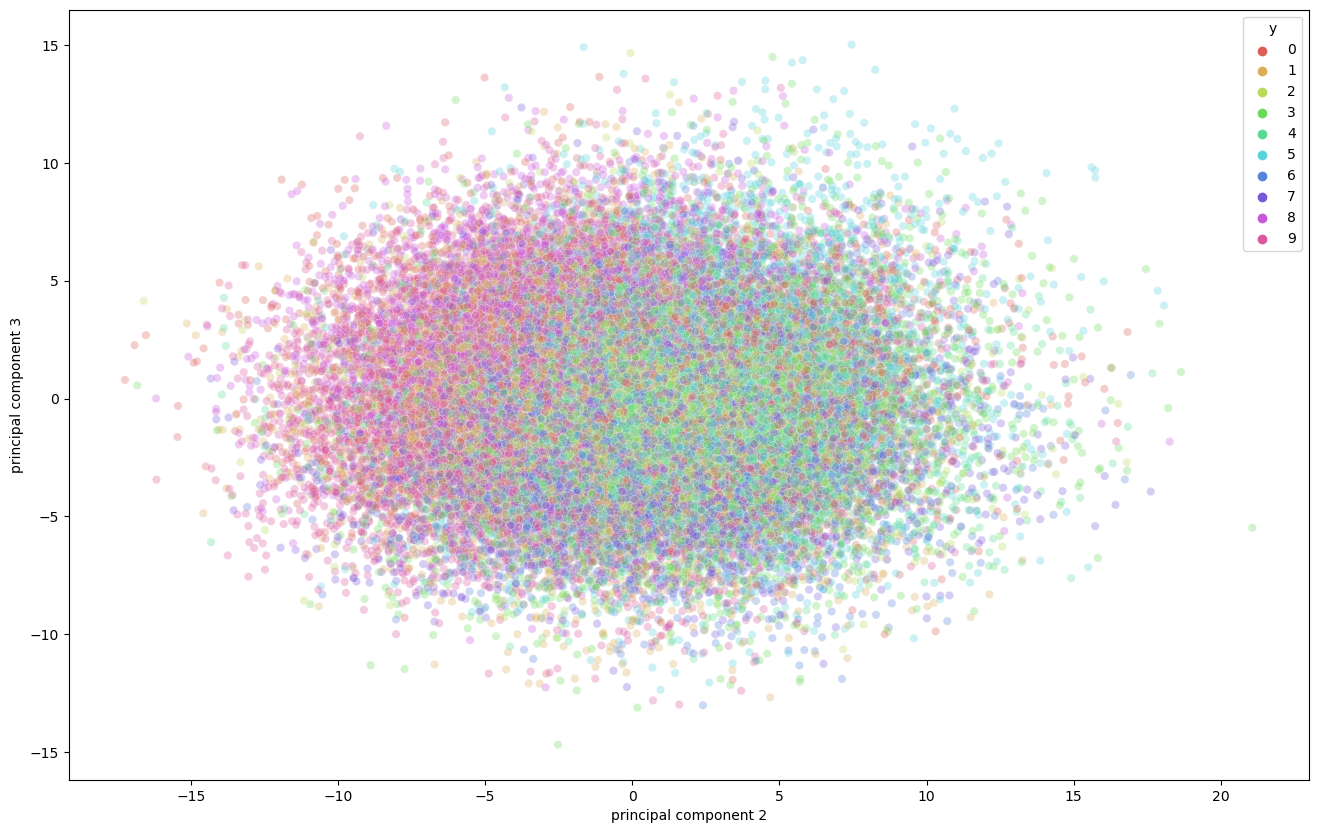

In [17]:
pca_cifar = PCA(n_components=3)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principal_cifar_Df['y'] = y_train

principal_cifar_Df.head()

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 2", y="principal component 3",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

### Case 3: Number of components will be set to 4

<Axes: xlabel='principal component 3', ylabel='principal component 4'>

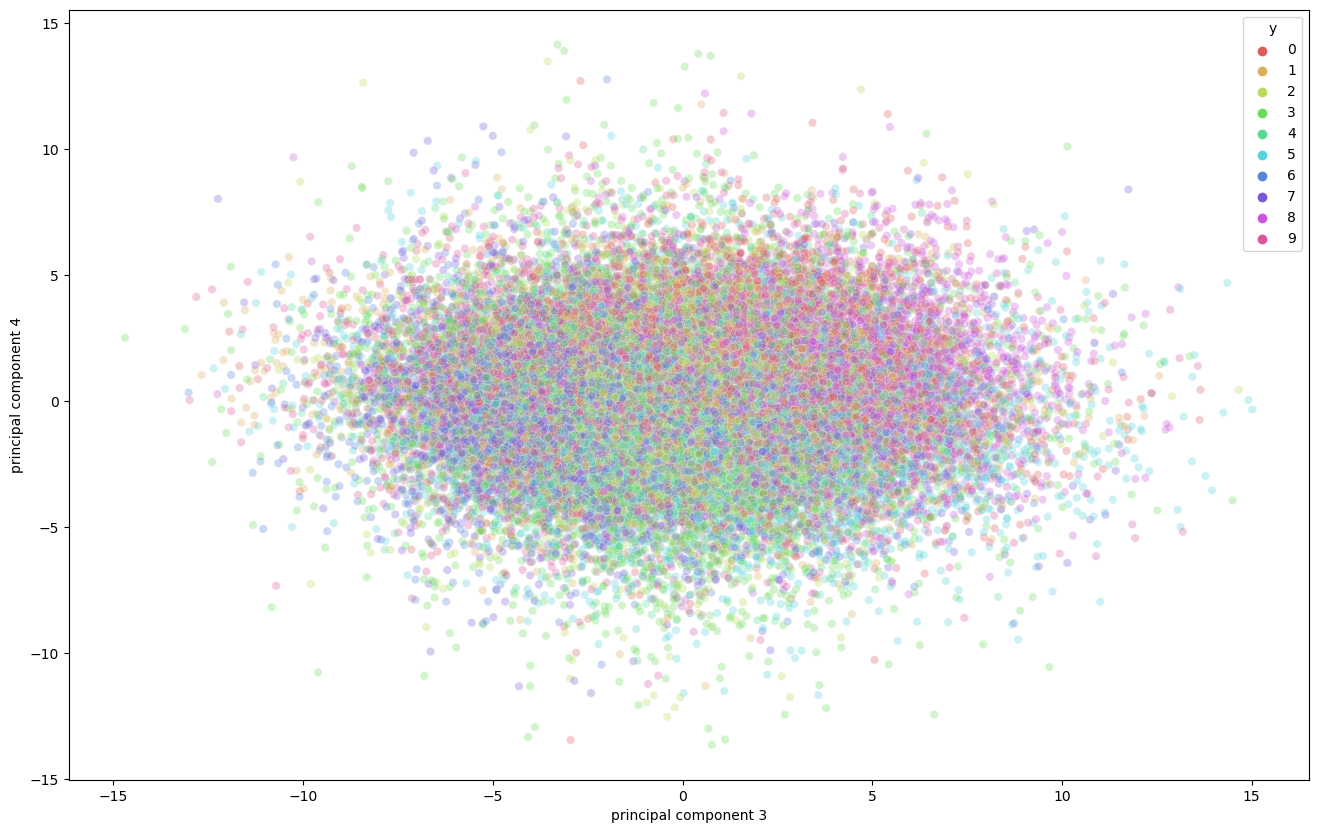

In [18]:
pca_cifar = PCA(n_components=4)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])
principal_cifar_Df['y'] = y_train

principal_cifar_Df.head()

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 3", y="principal component 4",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

### Case 4: Number of components will be set to 5

<Axes: xlabel='principal component 4', ylabel='principal component 5'>

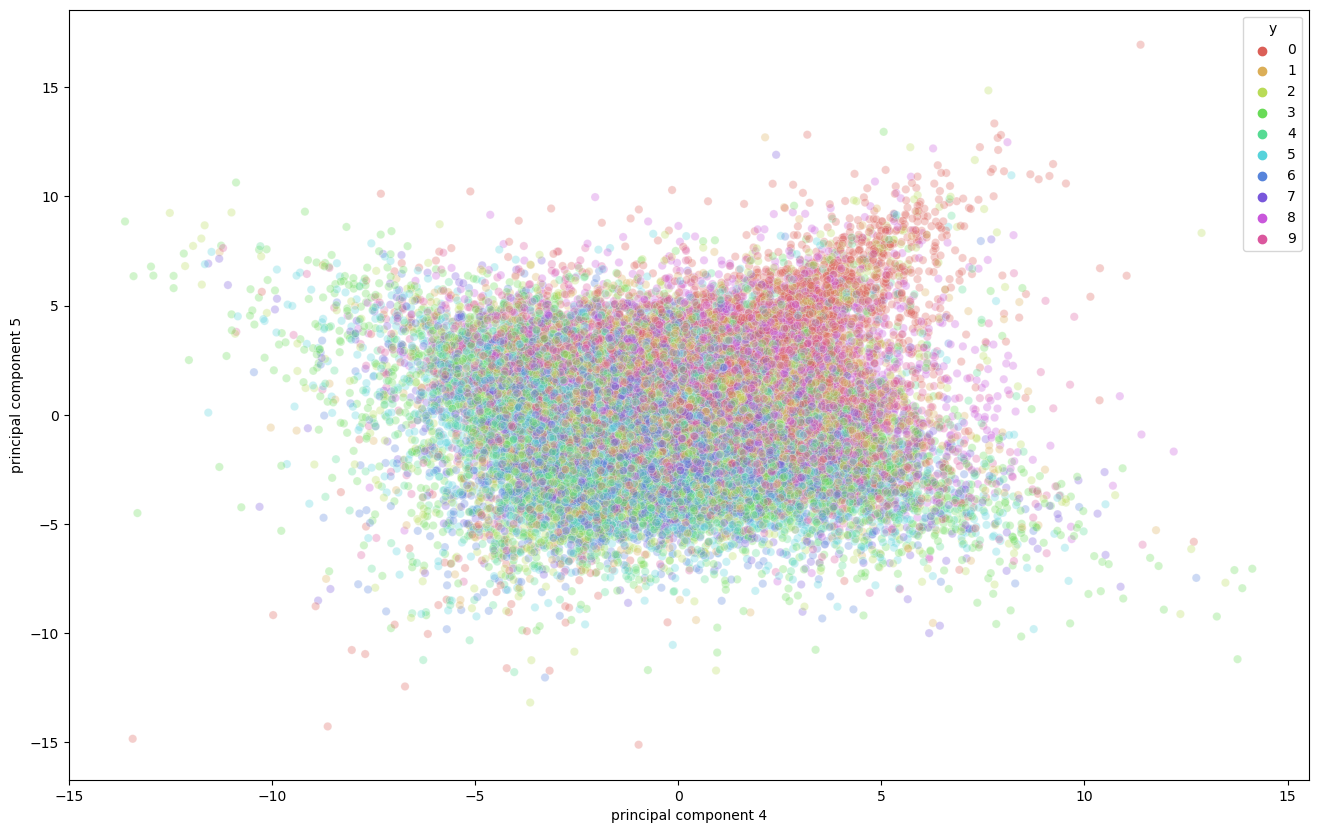

In [19]:
pca_cifar = PCA(n_components=5)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
principal_cifar_Df['y'] = y_train

principal_cifar_Df.head()

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 4", y="principal component 5",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

### Diplaying ```explained_variance_ratio``` using a bar chart

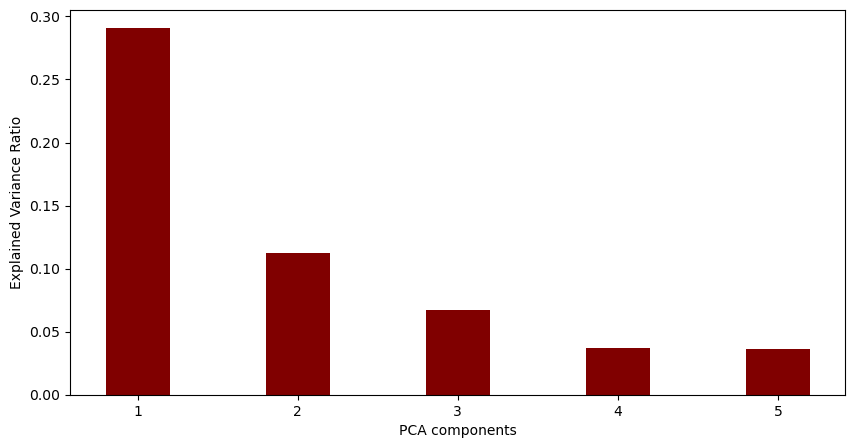

In [20]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(list(range(1, pca_cifar.n_components_+1)), pca_cifar.explained_variance_ratio_, color ='maroon', 
        width = 0.4)
 
plt.xlabel("PCA components")
plt.ylabel("Explained Variance Ratio")
plt.show()

## 2.2. Speeding Up ML for diffent variance ratios

In [21]:
# Writing up the model that will be used later

y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

batch_size = 128
epochs = 20

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(99,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

C:\Users\OKass\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 1024)           │       102,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,810,698 (6.91 MB)

 Trainable params: 1,810,698 (6.91 MB)

 Non-trainable params: 0 (0.00 B)

### 2.2.1 Case 1: PCA will hold 90% of the variance

In [22]:
pca = PCA(0.9)
pca.fit(x_train_flat)
PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
print(pca.n_components_)

train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

history = model.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(test_img_pca, y_test))

99
Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.3588 - loss: 1.7879 - val_accuracy: 0.4905 - val_loss: 1.4338
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5259 - loss: 1.3389 - val_accuracy: 0.5157 - val_loss: 1.3725
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5901 - loss: 1.1413 - val_accuracy: 0.5524 - val_loss: 1.2886
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.6545 - loss: 0.9599 - val_accuracy: 0.5406 - val_loss: 1.3625
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.7139 - loss: 0.8007 - val_accuracy: 0.5522 - val_loss: 1.3889
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.7706 - loss: 0.6418 - val_accuracy: 0.5499 - val_loss: 1.5912
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8224 - loss: 0.4952 - val_accuracy: 0.5570 - val_loss: 1.6135
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8686 - loss: 0.3721 - val_a

### 2.2.2 Case 2: PCA will hold 80% of the variance

In [ ]:
pca = PCA(0.8)
pca.fit(x_train_flat)
PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
print(pca.n_components_)


train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)


history = model.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(test_img_pca, y_test))

### 2.2.3 Case 3: PCA will hold 70% of the variance

In [ ]:
pca = PCA(0.7)
pca.fit(x_train_flat)
PCA(copy=True, iterated_power='auto', n_components=0.7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
print(pca.n_components_)


train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

history = model.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(test_img_pca, y_test))

### 2.2.4 Case 4: PCA will hold 60% of the variance

In [ ]:
pca = PCA(0.6)
pca.fit(x_train_flat)
PCA(copy=True, iterated_power='auto', n_components=0.6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
print(pca.n_components_)


train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

history = model.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(test_img_pca, y_test))

### 2.2.5 Case 5: PCA will hold 50% of the variance

In [ ]:
pca = PCA(0.5)
pca.fit(x_train_flat)
PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
print(pca.n_components_)


train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

history = model.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(test_img_pca, y_test))